## Gen-I izziv
Grafična analiza proizvodnje in prevzema električne energije za Slovenijo v letu 2019.<br>
**Časovno odobje podatkov:** 1.1.2019 - 31.12.2019<br>
**Frekvenca:** 1 ura<br>

Uporabljene Python knjižnice:
* Pandas
* Numpy
* Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Priprava podatkov

In [2]:
df = pd.read_csv('/Users/blazkranjcev/Py Scripts/Gen_I/Seznam_1.csv', sep=';')  

In [3]:
# hiter pregled tabele
df.head(10)

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
0,01.01.2019,H01,968.0,977.0,1083,1087.0,694.0,246.0,50.0
1,01.01.2019,H02,962.0,1059.0,1036,1050.0,695.0,262.0,115.0
2,01.01.2019,H03,959.0,982.0,997,1008.0,695.0,250.0,49.0
3,01.01.2019,H04,961.0,979.0,972,960.0,694.0,250.0,47.0
4,01.01.2019,H05,870.0,947.0,983,935.0,694.0,218.0,47.0
5,01.01.2019,H06,885.0,937.0,1017,958.0,694.0,207.0,47.0
6,01.01.2019,H07,925.0,943.0,1079,1004.0,694.0,208.0,52.0
7,01.01.2019,H08,1018.0,1046.0,1137,1048.0,694.0,228.0,136.0
8,01.01.2019,H09,1086.0,1073.0,1204,1086.0,694.0,221.0,170.0
9,01.01.2019,H10,1073.0,1066.0,1271,1127.0,694.0,220.0,163.0


In [4]:
# pretvorba v datumski format
df['datum'] = pd.to_datetime(df['datum'])

In [5]:
# pretvorba ure v numerični format
df['ura'].replace('H', '', regex=True, inplace=True)
df['ura'] = df['ura'].astype(int)

In [6]:
# preverjanje formatov za vse stolpce
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
datum                     8760 non-null datetime64[ns]
ura                       8760 non-null int64
predvidena_proizvodnja    8735 non-null float64
dejanska_proizvodnja      8759 non-null float64
predviden_prevzem         8760 non-null int64
dejanski_prevzem          8759 non-null float64
nek                       8759 non-null float64
termo                     8759 non-null float64
hidro                     8759 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 616.1 KB


In [7]:
# preverjanje manjkajočih vrednosti
null_data = df[df.isnull().any(axis=1)]
null_data

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
2138,2019-03-31,3,1187.0,1175.0,1072,1097.0,NaN,NaN,NaN
2159,2019-03-31,24,NaN,NaN,0,NaN,696.0,309.0,156.0
3312,2019-05-19,1,NaN,1504.0,1144,1133.0,695.0,428.0,386.0
3313,2019-05-19,2,NaN,1317.0,1080,1058.0,695.0,325.0,302.0
3314,2019-05-19,3,NaN,1248.0,1069,1029.0,695.0,271.0,287.0
3315,2019-05-19,4,NaN,1236.0,1057,1009.0,695.0,265.0,281.0
3316,2019-05-19,5,NaN,1227.0,1057,1011.0,695.0,258.0,278.0
3317,2019-05-19,6,NaN,1245.0,1057,1012.0,695.0,264.0,290.0
3318,2019-05-19,7,NaN,1258.0,1090,1055.0,695.0,257.0,311.0
3319,2019-05-19,8,NaN,1465.0,1179,1172.0,695.0,265.0,511.0


V podatkovnem setu je skupaj le 25 manjkajočih vrednosti za nekaj ur dne 19.5. Zaključimo, da je vpliv le-teh za našo analizo zanemarljiv in lahko nadaljujemo brez poseganja v podatkovni set.

## Proizvodnja in prevzem na mesečni ravni

In [8]:
mesec = df.set_index('datum')
mesec = mesec.groupby(pd.Grouper(freq='M')).sum().reset_index()
mesec

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
0,2019-01-31,9300,1117301.0,1098368.0,1201828,1194558.0,495299.0,370756.0,235561.0
1,2019-02-28,8400,1074484.0,1042201.0,1027813,1016069.0,449201.0,329769.0,269512.0
2,2019-03-31,9300,1127084.0,1083829.0,1120331,1107473.0,498370.0,301491.0,290561.0
3,2019-04-30,9000,1147616.0,1124467.0,1047656,1042842.0,481817.0,270447.0,380635.0
4,2019-05-31,9300,1273269.0,1284865.0,1123318,1119876.0,498064.0,333071.0,460443.0
5,2019-06-30,9000,1242940.0,1232105.0,1076303,1078118.0,477490.0,325003.0,435329.0
6,2019-07-31,9300,1227439.0,1216208.0,1094609,1085899.0,490128.0,414687.0,319092.0
7,2019-08-31,9300,1094119.0,1062983.0,1092483,1087476.0,489290.0,280015.0,298273.0
8,2019-09-30,9000,1131851.0,1109121.0,1067784,1054307.0,473567.0,344220.0,297462.0
9,2019-10-31,9300,904677.0,889040.0,1106549,1093521.0,201268.0,425010.0,275972.0


<Figure size 432x288 with 0 Axes>

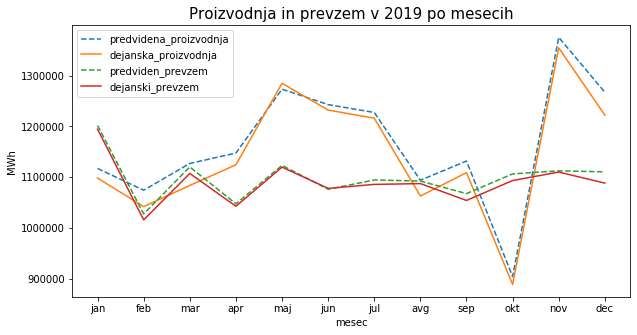

In [9]:
plt.tight_layout()
plt.subplots(figsize=(10,5))

N = 12
ind = np.arange(N)+1

p1 = plt.plot(ind, 'predvidena_proizvodnja', data=mesec, linestyle='dashed')
p2 = plt.plot(ind, 'dejanska_proizvodnja', data=mesec)
p3 = plt.plot(ind, 'predviden_prevzem', data=mesec, linestyle='dashed')
p4 = plt.plot(ind, 'dejanski_prevzem', data=mesec)

plt.title(label='Proizvodnja in prevzem v 2019 po mesecih', fontsize=15)
plt.xlabel('mesec')
plt.ylabel('MWh')
plt.xticks(ind, ('jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'avg', 'sep', 'okt', 'nov', 'dec'))

plt.legend()
plt.show()

Oktobra 2019 je opazen strm padec proizvodnje zaradi remonta NEK. 

## Proizvodnja v 2019 glede na vire

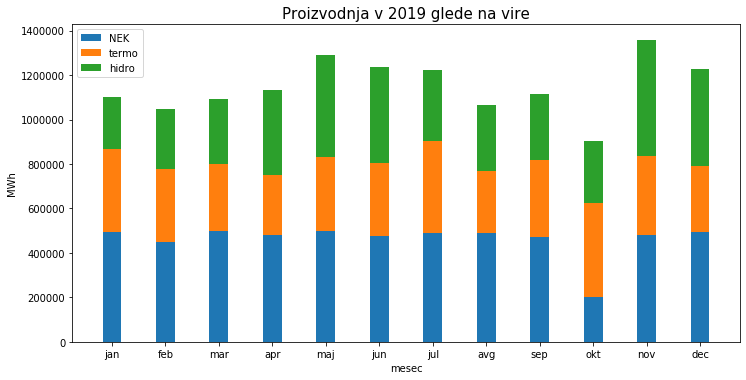

In [10]:
plt.subplots(figsize=(10,5))
plt.tight_layout()

width = 0.35
N=12
ind = np.arange(N)
p1 = plt.bar(ind, mesec.nek, width, data=mesec)
p2 = plt.bar(ind, mesec.termo, width, bottom=mesec.nek, data=mesec)
p3 = plt.bar(ind, mesec.hidro, width, bottom=mesec.nek + mesec.termo, data=mesec)

plt.xticks(ind, ('jan', 'feb', 'mar', 'apr', 'maj', 'jun', 'jul', 'avg', 'sep', 'okt', 'nov', 'dec'))
plt.legend((p1[0], p2[0], p3[0]), ('NEK', 'termo', 'hidro'))
plt.title(label='Proizvodnja v 2019 glede na vire', fontsize=15)
plt.xlabel('mesec')
plt.ylabel('MWh')
plt.show()

Iz grafa je razvidno, da so NEK in termoelektrarne t.i. "baseload" elektrarne, saj se njihova proizvodnja le redko spreminja. Več nihanja opazimo pri hidroelektrarnah, ki so odvisne od vodostaja rek in tudi lažje prilagajajo proizvodnjo glede na povpraševanje na trgu. 

## Primerjava med proizvodnjo-prevzemom med dnevi v tednu

In [11]:
dan_1503 = df.loc[df['datum'] == '2019-03-15']
dan_1703 = df.loc[df['datum'] == '2019-03-17']

<Figure size 432x288 with 0 Axes>

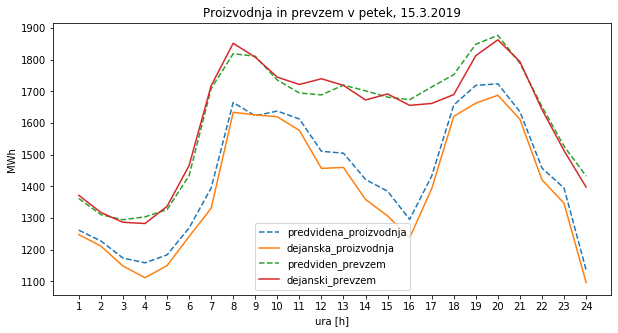

In [12]:
plt.tight_layout()
plt.subplots(figsize=(10,5))

N = 24
ind = np.arange(N)+1

p1 = plt.plot(ind, 'predvidena_proizvodnja', data=dan_1503, linestyle='dashed')
p2 = plt.plot(ind, 'dejanska_proizvodnja', data=dan_1503)
p3 = plt.plot(ind, 'predviden_prevzem', data=dan_1503, linestyle='dashed')
p4 = plt.plot(ind, 'dejanski_prevzem', data=dan_1503)

plt.title(label='Proizvodnja in prevzem v petek, 15.3.2019', fontsize=12)
plt.xlabel('ura [h]')
plt.ylabel('MWh')
plt.xticks(np.arange(min(ind), max(ind)+1, 1.0))

plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

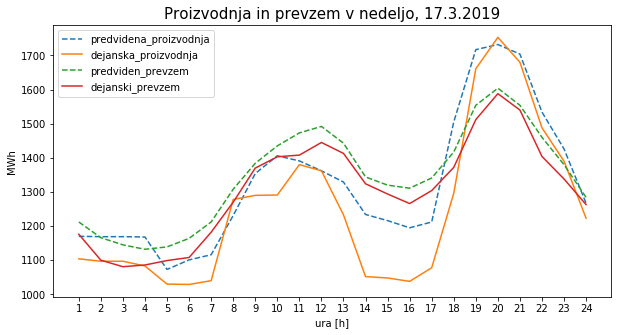

In [13]:
plt.tight_layout()
plt.subplots(figsize=(10,5))

N = 24
ind = np.arange(N)+1

p1 = plt.plot(ind, 'predvidena_proizvodnja', data=dan_1703, linestyle='dashed')
p2 = plt.plot(ind, 'dejanska_proizvodnja', data=dan_1703)
p3 = plt.plot(ind, 'predviden_prevzem', data=dan_1703, linestyle='dashed')
p4 = plt.plot(ind, 'dejanski_prevzem', data=dan_1703)

plt.title(label='Proizvodnja in prevzem v nedeljo, 17.3.2019', fontsize=15)
plt.xlabel('ura [h]')
plt.ylabel('MWh')
plt.xticks(np.arange(min(ind), max(ind)+1, 1.0))

plt.legend()
plt.show()

Razlika med delovnim dnem in vikendom je opazna pri dnevnem nihanju odvzema. Za delovni dan sta značilna skoraj simetrična vrhova zjutraj in zvečer. Med vikendom pa je izrazit predvsem večerni vrh. 

## Dnevna proizvodnja po virih

<Figure size 432x288 with 0 Axes>

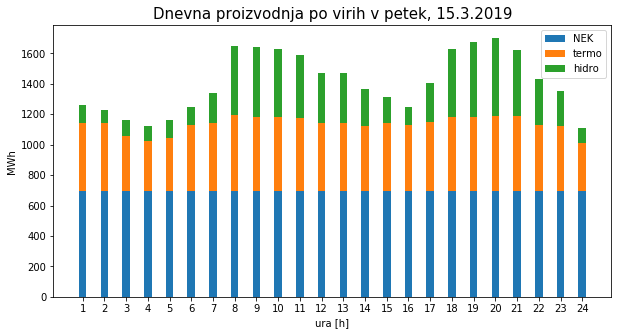

In [14]:
plt.tight_layout()
plt.subplots(figsize=(10,5))

width = 0.35
N=24
ind = np.arange(N)+1 

p1 = plt.bar(ind, dan_1503.nek, width, data=dan_1503)
p2 = plt.bar(ind, dan_1503.termo, width, bottom=dan_1503.nek, data=dan_1503)
p3 = plt.bar(ind, dan_1503.hidro, width, bottom=dan_1503.nek + dan_1503.termo, data=dan_1503)

plt.xticks(ticks=ind)
plt.legend((p1[0], p2[0], p3[0]), ('NEK', 'termo', 'hidro'))
plt.title(label='Dnevna proizvodnja po virih v petek, 15.3.2019', fontsize=15)

plt.xlabel('ura [h]')
plt.ylabel('MWh')
plt.show()

Proizvodnja v NEK je konstantna. Termoelektrarne rahlo upočasnijo proizvodnjo v poznih nočnih urah. Najbolj prilagodljive na jutranji in večerni vrh prevzema so hidroelektrarne. 

## Primerjava prevzema med dnevi v tednu

In [15]:
teden = (df['datum'] > '2019-06-16') & (df['datum'] <= '2019-06-23')
teden = df.loc[teden]

In [16]:
teden

,datum,ura,predvidena_proizvodnja,dejanska_proizvodnja,predviden_prevzem,dejanski_prevzem,nek,termo,hidro
4008,2019-06-17,1,1727.0,1694.0,1232,1211.0,684.0,391.0,625.0
4009,2019-06-17,2,1608.0,1582.0,1187,1170.0,684.0,307.0,595.0
4010,2019-06-17,3,1557.0,1529.0,1146,1104.0,684.0,256.0,594.0
4011,2019-06-17,4,1557.0,1530.0,1143,1104.0,684.0,255.0,597.0
4012,2019-06-17,5,1557.0,1525.0,1167,1138.0,684.0,251.0,595.0
...,...,...,...,...,...,...,...,...,...
4171,2019-06-23,20,1759.0,1843.0,1380,1351.0,687.0,368.0,793.0
4172,2019-06-23,21,2018.0,2092.0,1418,1366.0,688.0,462.0,948.0
4173,2019-06-23,22,2016.0,2143.0,1435,1404.0,688.0,485.0,975.0
4174,2019-06-23,23,1788.0,1887.0,1394,1353.0,688.0,398.0,808.0


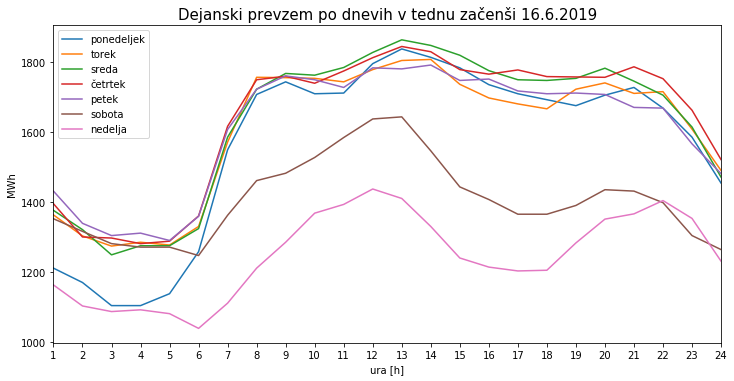

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
plt.tight_layout()

N = 24
ind = np.arange(N)+1

teden.groupby(['ura','datum']).sum()['dejanski_prevzem'].unstack().plot(ax=ax)
plt.xlabel('ura [h]')
plt.ylabel('MWh')
plt.xticks(ind)
plt.title(label='Dejanski prevzem po dnevih v tednu začenši 16.6.2019', fontsize=15)

plt.legend(['ponedeljek', 'torek', 'sreda', 'četrtek', 'petek', 'sobota', 'nedelja'])

plt.show()

Največja razlika v odvzemu je opazna med delovnimi dnevi in vikendi. V soboto in nedeljo odvzem močno upade, vrh pa se pojavi okrog poldneva. Prav tako imajo vsi dnevi manjši vrh v večernih urah. 

## Primerjava odvzema med letnimi časi za primerljive dneve

In [18]:
seznam_datumov = ['2019-01-16', '2019-04-17', '2019-07-17', '2019-10-16']
letni_cas = df[df['datum'].isin(seznam_datumov)]

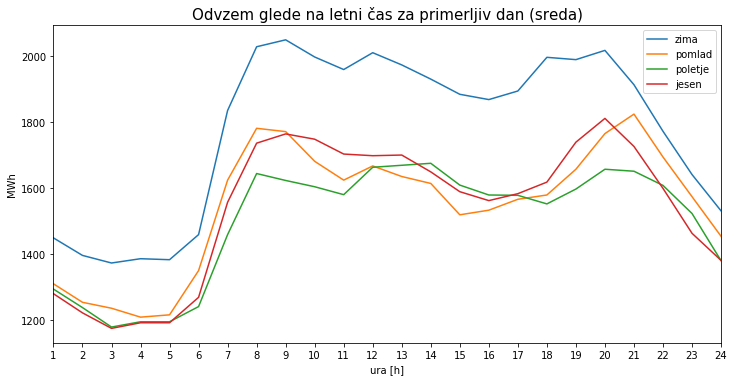

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
plt.tight_layout()
N = 24
ind = np.arange(N)+1

letni_cas.groupby(['ura','datum']).sum()['dejanski_prevzem'].unstack().plot(ax=ax)
plt.xlabel('ura [h]')
plt.ylabel('MWh')
plt.xticks(ind)
plt.title(label='Odvzem glede na letni čas za primerljiv dan (sreda)', fontsize=15)

plt.legend(['zima', 'pomlad', 'poletje', 'jesen'])

plt.show()

Največji dejanski odvzem je po pričakovanjih pozimi, zaradi ogrevanja prostorov in malo ur sončnega sevanja, kar pomeni več odvzema za svetlobna telesa. Prav tako se ljudje več zadržujejo v zaprtih prostorih, kar še dodatno poveča odvzem. Pomlad in poletje imata najmanjši odvzem, saj večino dni ni potrebe po ogrevanju ali klimatiziranju prostorov. Hkrati pa je več ur sončnega sevanja, kar pomeni manj porabe za osvetljevanje. 